In [1]:
##############################################################################################################
# DESCRIPTION: Carga un modelo.
#              
# RESULTS:     VI0342_04_00noisy_idx014 es un ejemplo de imagen que puntúa bien pero no.
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################
import os, sys

IMG_WIDTH = 256
IMG_HEIGHT = 256

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-256-convsim-b"

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

In [3]:
##################
# PATHS
##################

IMG_PATH = os.path.abspath(os.path.join('../../../dataset/cases/', IMG_CASE))
IMG_PATH_VALID = os.path.join( IMG_PATH , 'validation')
IMG_PATH_TEST = IMG_PATH + "/test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

In [4]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)

import DatasetUtilsTifF as dsutils
import ReportsK as reports
import keras.models

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid \
    = dsutils.readDataset( IMG_PATH_TRAIN, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid \
    = dsutils.readDataset( IMG_PATH_VALID, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid \
    = dsutils.reshapeDataset( train_noisy, train_nitid, IMG_WIDTH, IMG_HEIGHT )

val_noisy, val_nitid \
    = dsutils.reshapeDataset( val_noisy, val_nitid, IMG_WIDTH, IMG_HEIGHT )

Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000
Noisy files:606
Nitid files:606
Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000\validation
Noisy files:148
Nitid files:148


In [6]:
model = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL)))

In [7]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Images count =148
Best RMSENZ  =143 (0.97)
Best MAENZ   =143 (0.97)
Best Accuracy=146 (0.99)
RMSE-NZ  Pred=0.0281  Noisy=0.1032
MAE-NZ   Pred=0.0225  Noisy=0.0923
PSNR     Pred=21.9 dB Noisy=10.8 dB
Accuracy Pred=0.32    Noisy=0.08
SSM      Pred=0.95    Noisy=0.67
HOG MSE  Pred=0.06    Noisy=0.04


In [8]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )
reports.saveScores( DEST_TESTS, SAVED_MODEL, predictions_metrics )

Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test/
Noisy files:8
Nitid files:8
Index:0
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0112_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0112_01_02nitid_idx134.tif


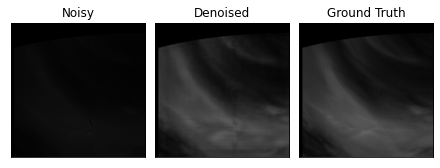

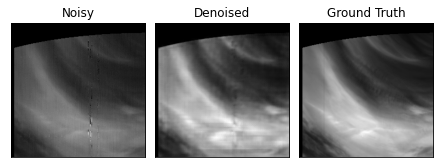

RMSE-NZ  Pred=0.0189  Noisy=0.1487 BEST
MAE-NZ   Pred=0.0139  Noisy=0.1272 BEST
PSNR     Pred=26.3 dB Noisy=8.4 dB BEST
Accuracy Pred=0.47    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.49
HOG MSE  Pred=0.04    Noisy=0.07
******************************************************
Index:1
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0127_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0127_01_02nitid_idx134.tif


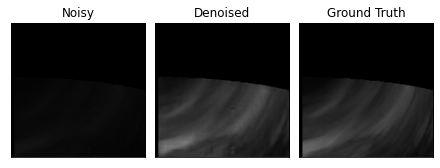

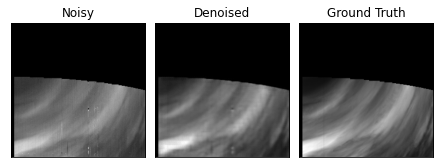

RMSE-NZ  Pred=0.0349  Noisy=0.1330 BEST
MAE-NZ   Pred=0.0302  Noisy=0.1193 BEST
PSNR     Pred=21.1 dB Noisy=9.5 dB BEST
Accuracy Pred=0.16    Noisy=0.05 BEST
SSM      Pred=0.96    Noisy=0.64
HOG MSE  Pred=0.10    Noisy=0.05
******************************************************
Index:2
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0318_04_03noisy_idx157.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0318_04_03nitid_idx146.tif


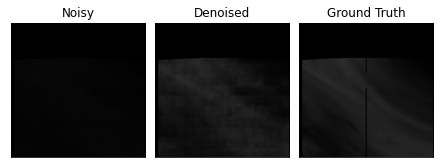

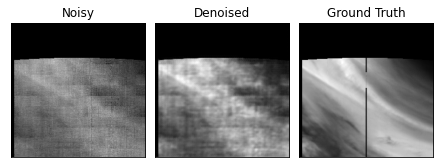

RMSE-NZ  Pred=0.0184  Noisy=0.0807 BEST
MAE-NZ   Pred=0.0139  Noisy=0.0734 BEST
PSNR     Pred=19.7 dB Noisy=6.9 dB BEST
Accuracy Pred=0.45    Noisy=0.04 BEST
SSM      Pred=0.96    Noisy=0.63
HOG MSE  Pred=0.07    Noisy=0.11
******************************************************
Index:3
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_00noisy_idx014.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_00nitid_idx017.tif


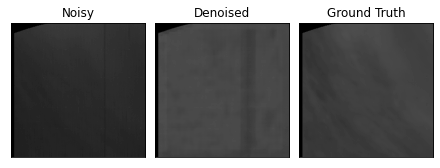

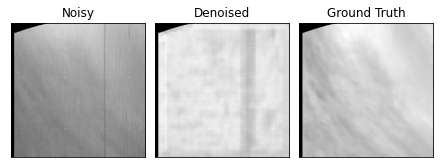

RMSE-NZ  Pred=0.0394  Noisy=0.0841 BEST
MAE-NZ   Pred=0.0332  Noisy=0.0827 BEST
PSNR     Pred=17.9 dB Noisy=11.3 dB BEST
Accuracy Pred=0.16    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.84
HOG MSE  Pred=0.02    Noisy=0.02
******************************************************
Index:4
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_02nitid_idx134.tif


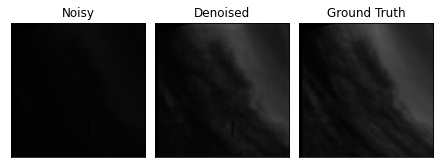

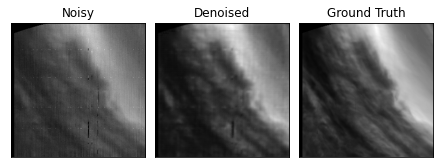

RMSE-NZ  Pred=0.0266  Noisy=0.1142 BEST
MAE-NZ   Pred=0.0228  Noisy=0.0943 BEST
PSNR     Pred=22.0 dB Noisy=9.4 dB BEST
Accuracy Pred=0.19    Noisy=0.02 BEST
SSM      Pred=0.94    Noisy=0.53
HOG MSE  Pred=0.06    Noisy=0.08
******************************************************
Index:5
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0323_04_03noisy_idx157.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0323_04_03nitid_idx146.tif


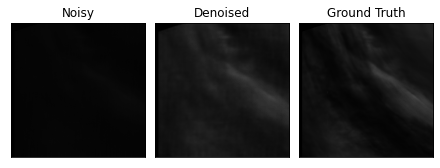

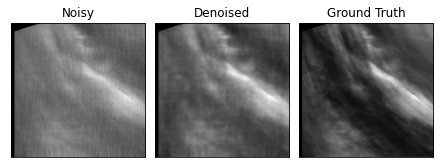

RMSE-NZ  Pred=0.0331  Noisy=0.0637 BEST
MAE-NZ   Pred=0.0275  Noisy=0.0509 BEST
PSNR     Pred=18.6 dB Noisy=12.9 dB BEST
Accuracy Pred=0.24    Noisy=0.12 BEST
SSM      Pred=0.87    Noisy=0.46
HOG MSE  Pred=0.04    Noisy=0.06
******************************************************
Index:6
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_01_02nitid_idx134.tif


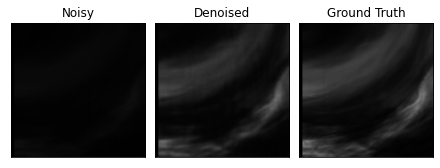

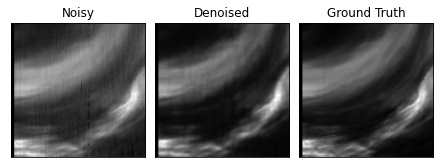

RMSE-NZ  Pred=0.0284  Noisy=0.1183 BEST
MAE-NZ   Pred=0.0233  Noisy=0.0917 BEST
PSNR     Pred=24.9 dB Noisy=12.4 dB BEST
Accuracy Pred=0.24    Noisy=0.08 BEST
SSM      Pred=0.93    Noisy=0.54
HOG MSE  Pred=0.05    Noisy=0.05
******************************************************
Index:7
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_05_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_05_02nitid_idx134.tif


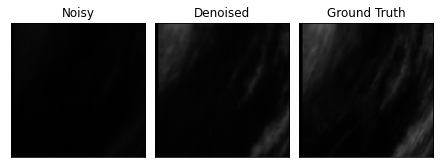

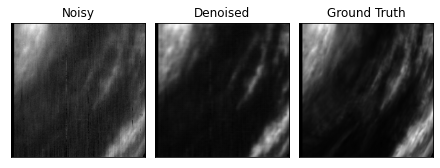

RMSE-NZ  Pred=0.0268  Noisy=0.0732 BEST
MAE-NZ   Pred=0.0196  Noisy=0.0479 BEST
PSNR     Pred=22.2 dB Noisy=13.4 dB BEST
Accuracy Pred=0.41    Noisy=0.22 BEST
SSM      Pred=0.88    Noisy=0.70
HOG MSE  Pred=0.04    Noisy=0.04
******************************************************


In [9]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid \
    = dsutils.readDataset( IMG_PATH_TEST, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid \
    = dsutils.reshapeDataset( test_noisy, test_nitid, IMG_WIDTH, IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD )

Index:2
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000\validation\VI0112_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000\validation\VI0112_01_02nitid_idx134.tif


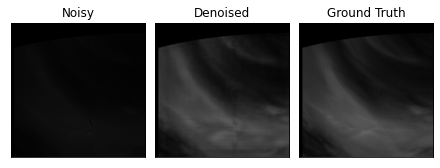

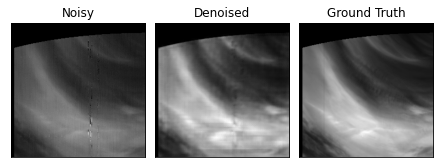

RMSE-NZ  Pred=0.0189  Noisy=0.1487 BEST
MAE-NZ   Pred=0.0139  Noisy=0.1272 BEST
PSNR     Pred=26.3 dB Noisy=8.4 dB BEST
Accuracy Pred=0.47    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.49
HOG MSE  Pred=0.04    Noisy=0.07
******************************************************


In [10]:
test_indexes = np.array([2])
reports.predictByIndexes( model, val_noisy, val_nitid, val_noisy_files, val_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD, \
                        save_pred = True, save_folder_name = DEST_TESTS )